In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 


C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("loans_full_schema.csv")
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [3]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [4]:
df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [5]:
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
x=df['emp_title'].unique()
len(x)

4742

In [7]:
#not useful column so will drop it

In [8]:
df=df.drop(columns=['emp_title'])

In [9]:
#second
df['emp_length'].isna().sum()

817

In [10]:
df['emp_length'].unique()

array([ 3., 10.,  1., nan,  2.,  5.,  7.,  4.,  9.,  0.,  6.,  8.])

In [11]:
df['emp_length'].interpolate(inplace=True)
#simple imputer as linear

In [12]:
df['emp_length'].unique()

array([ 3.        , 10.        ,  1.        ,  2.        ,  5.        ,
        6.5       ,  7.5       ,  7.        ,  4.        ,  9.        ,
        3.5       ,  0.        ,  6.        ,  8.        ,  1.5       ,
        2.33333333,  1.66666667,  9.5       ,  8.5       ,  4.5       ,
        2.5       ,  5.5       ,  0.66666667,  1.33333333,  0.5       ,
        1.66666667,  7.33333333,  7.66666667,  7.33333333,  4.66666667,
        8.66666667,  6.66666667,  3.33333333,  8.33333333,  5.33333333,
        6.66666667,  1.33333333,  9.33333333,  9.66666667,  5.33333333,
        2.66666667,  4.33333333,  3.66666667,  7.66666667,  3.66666667,
        4.66666667,  0.33333333,  3.33333333])

In [13]:
len(df['state'].unique()) #states are correct as per the record

50

In [14]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['state'] = le.fit_transform(df['state'])

In [15]:
#homeownership
le = LabelEncoder() 
df['homeownership'] = le.fit_transform(df['homeownership'])

In [16]:
#annual_income
df['annual_income']=df['annual_income'].astype(int)

In [17]:
df['verified_income'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [18]:
#verified_income
le = LabelEncoder() 
df['verified_income'] = le.fit_transform(df['verified_income'])

In [19]:
#debt_to_income
df.debt_to_income.interpolate(inplace=True)

In [20]:
df.debt_to_income.isna().sum()

0

In [21]:
df.annual_income_joint.interpolate(inplace=True)

In [22]:
df.annual_income_joint.isna().sum()

4

In [23]:
df['annual_income_joint'].fillna((df['annual_income_joint'].mean()), inplace=True)
#peli char values ne mean thi krvi pdi impute

In [24]:
df.verification_income_joint.isna().sum()

8545

In [25]:
df.verification_income_joint.interpolate(inplace=True,method="ffill")

In [26]:
df.verification_income_joint.isna().sum()

4

In [27]:
df.verification_income_joint.unique()

array([nan, 'Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [28]:
df.verification_income_joint = df.verification_income_joint.fillna(df.verification_income_joint.mode().iloc[0])


In [29]:
df.verification_income_joint.isna().sum()

0

In [30]:
le = LabelEncoder() 
df['verification_income_joint'] = le.fit_transform(df['verification_income_joint'])

In [31]:
df.debt_to_income_joint.interpolate(inplace=True)

In [32]:
df.debt_to_income_joint.isna().sum()

4

In [33]:
df['debt_to_income_joint'].fillna((df['debt_to_income_joint'].mean()), inplace=True)
#peli char values ne mean thi krvi pdi impute

In [34]:
df.debt_to_income_joint.isna().sum()

0

In [35]:
df.months_since_last_delinq.interpolate(inplace=True)

In [36]:
df.months_since_last_delinq.isna().sum()

0

In [37]:
df['months_since_last_delinq']=df['months_since_last_delinq'].astype(int)

In [38]:
df['months_since_last_delinq'].dtype

dtype('int32')

In [39]:
df.inquiries_last_12m.unique()

array([ 6,  1,  4,  0,  7,  3,  8,  2,  5, 13,  9, 10, 12, 11, 17, 15, 16,
       14, 22, 18, 26, 20, 19, 24, 21, 29], dtype=int64)

In [40]:
df.total_credit_lines.unique()

array([28, 30, 31,  4, 22, 32, 12, 35,  9, 26, 65, 21, 18, 11, 13, 19, 64,
       10, 20, 17, 36, 37, 27,  6, 24, 29, 15, 23, 39, 16,  5, 40, 44, 41,
       14, 25, 55, 34, 33,  7, 38, 62,  8, 43, 48, 45,  3, 63, 42, 46,  2,
       49, 58, 51, 68, 78, 54, 57, 59, 74, 47, 52, 67, 56, 53, 61, 50, 72,
       60, 70, 80, 71, 87, 66, 69, 83, 76, 77], dtype=int64)

In [41]:
df.num_collections_last_12m.unique()

array([0, 2, 1, 3], dtype=int64)

In [42]:
df.num_historical_failed_to_pay.unique()

array([ 0,  1,  3,  2,  4,  7,  5, 52,  6], dtype=int64)

In [43]:
df.months_since_90d_late.isna().sum()

7715

In [44]:
df.months_since_90d_late.interpolate(inplace=True)

In [45]:
df.months_since_90d_late.isna().sum()

0

In [46]:
df.months_since_last_credit_inquiry.isna().sum()

1271

In [47]:
df.months_since_last_credit_inquiry.interpolate(inplace=True)

In [48]:
df['months_since_last_credit_inquiry']=df['months_since_last_credit_inquiry'].astype(int)

In [49]:
df.num_accounts_120d_past_due.isna().sum()

318

In [50]:
df.num_accounts_120d_past_due.interpolate(inplace=True)

In [51]:
df['num_accounts_120d_past_due']=df['num_accounts_120d_past_due'].astype(int)

In [52]:
df['loan_purpose'].unique()

array(['moving', 'debt_consolidation', 'other', 'credit_card',
       'home_improvement', 'medical', 'house', 'small_business', 'car',
       'major_purchase', 'vacation', 'renewable_energy'], dtype=object)

In [53]:
df['application_type'].unique()

array(['individual', 'joint'], dtype=object)

In [54]:
le = LabelEncoder() 
df['application_type'] = le.fit_transform(df['application_type'])

In [55]:
df['application_type']=df['application_type'].astype(int)

In [56]:
df['grade'].unique()

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

In [57]:
le = LabelEncoder() 
df['grade'] = le.fit_transform(df['grade'])
df['grade']=df['grade'].astype(int)

In [58]:
df['sub_grade'].unique()

array(['C3', 'C1', 'D1', 'A3', 'C2', 'B5', 'C4', 'B2', 'B1', 'D3', 'F1',
       'E5', 'A2', 'A5', 'A4', 'A1', 'D4', 'D5', 'B3', 'D2', 'E1', 'G1',
       'B4', 'C5', 'E2', 'E4', 'F3', 'E3', 'F5', 'F2', 'F4', 'G4'],
      dtype=object)

In [59]:
le = LabelEncoder() 
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['sub_grade']=df['sub_grade'].astype(int)

In [60]:
df['issue_month'].unique()

array(['Mar-2018', 'Feb-2018', 'Jan-2018'], dtype=object)

In [61]:
le = LabelEncoder() 
df['issue_month'] = le.fit_transform(df['issue_month'])
df['issue_month']=df['issue_month'].astype(int)

In [62]:
               
le = LabelEncoder() 
df['loan_purpose'] = le.fit_transform(df['loan_purpose'])
df['loan_purpose']=df['loan_purpose'].astype(int)

In [63]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

In [64]:
le = LabelEncoder() 
df['loan_status'] = le.fit_transform(df['loan_status'])
df['loan_status']=df['loan_status'].astype(int)

In [65]:
df['initial_listing_status'].unique()

array(['whole', 'fractional'], dtype=object)

In [66]:
le = LabelEncoder() 
df['initial_listing_status'] = le.fit_transform(df['initial_listing_status'])
df['initial_listing_status']=df['initial_listing_status'].astype(int)

In [67]:
df['disbursement_method'].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [68]:
le = LabelEncoder() 
df['disbursement_method'] = le.fit_transform(df['disbursement_method'])
df['disbursement_method']=df['disbursement_method'].astype(int)

In [69]:
df.isna().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts

In [70]:
df.dtypes

emp_length                          float64
state                                 int32
homeownership                         int32
annual_income                         int32
verified_income                       int32
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint             int32
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq              int32
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts    

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

tax_liens                 num_collections_last_12m        0.000033
num_collections_last_12m  tax_liens                       0.000033
loan_purpose              tax_liens                       0.000066
tax_liens                 loan_purpose                    0.000066
annual_income             total_collection_amount_ever    0.000080
                                                            ...   
balance                   num_accounts_120d_past_due           NaN
paid_total                num_accounts_120d_past_due           NaN
paid_principal            num_accounts_120d_past_due           NaN
paid_interest             num_accounts_120d_past_due           NaN
paid_late_fees            num_accounts_120d_past_due           NaN
Length: 2916, dtype: float64

In [73]:
x=df.corr().unstack()
x

emp_length      emp_length         1.000000
                state              0.014417
                homeownership     -0.203218
                annual_income      0.089858
                verified_income    0.010166
                                     ...   
paid_late_fees  balance            0.004395
                paid_total        -0.007278
                paid_principal    -0.009399
                paid_interest      0.011381
                paid_late_fees     1.000000
Length: 2916, dtype: float64

In [74]:
X=df.loc[:, df.columns != 'interest_rate']
y=df['interest_rate']

from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
linear_regression= LinearRegression()
linear_regression.fit(X_train,y_train)
print('Accuracy on test set: {:.2f}'.format(linear_regression.score(X_test, y_test)))
from sklearn.metrics import mean_squared_error
y_pred=linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("LR MSE ",mse)

from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(dtr.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("DTR MSE ",mse)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=20,max_depth=10,criterion='mse',)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(forest.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("RF MSE ",mse)

from sklearn.svm import SVR
svr_rbf=SVR(C=1.0, epsilon=0.01, kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(svr_rbf.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("SVR MSE ",mse)

from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor(max_trials=100,residual_threshold=4,min_samples=16,random_state=0).fit(X_train, y_train)
y_pred=reg.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(reg.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("RANSAC MSE ",mse)




Accuracy on test set: 0.99
LR MSE  0.27596879953734105
Accuracy on test set: 1.00
DTR MSE  0.10036803333333337


C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Accuracy on test set: 1.00
RF MSE  0.011837072148659587
Accuracy on test set: 0.13
SVR MSE  21.801684028259142
Accuracy on test set: 0.89
RANSAC MSE  2.7924538881627536


In [75]:
features=x['interest_rate'].sort_values()
features

total_debit_limit                  -0.254225
disbursement_method                -0.168792
num_mort_accounts                  -0.138351
total_credit_limit                 -0.130497
account_never_delinq_percent       -0.124702
initial_listing_status             -0.100040
annual_income                      -0.099584
months_since_last_credit_inquiry   -0.090681
num_total_cc_accounts              -0.071238
total_credit_lines                 -0.044435
annual_income_joint                -0.031042
num_open_cc_accounts               -0.028891
months_since_last_delinq           -0.028744
emp_length                         -0.025670
num_satisfactory_accounts          -0.013330
open_credit_lines                  -0.012773
issue_month                        -0.008077
months_since_90d_late              -0.003416
paid_principal                     -0.001953
state                               0.002507
num_accounts_30d_past_due           0.007184
current_accounts_delinq             0.007184
total_coll

In [76]:
X=df[['total_debit_limit','disbursement_method','num_mort_accounts','total_credit_limit','account_never_delinq_percent','initial_listing_status','annual_income','months_since_last_credit_inquiry','num_total_cc_accounts','total_credit_lines','earliest_credit_line','loan_status','accounts_opened_24m','inquiries_last_12m','debt_to_income','verified_income','term','paid_interest']]

In [77]:
y=df['interest_rate']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

linear_regression= LinearRegression()
linear_regression.fit(X_train,y_train)
print('Accuracy on test set: {:.2f}'.format(linear_regression.score(X_test, y_test)))
y_pred=linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("LR MSE ",mse)

dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(dtr.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("DTR MSE ",mse)

forest=RandomForestRegressor(n_estimators=20,max_depth=10,criterion='mse',)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(forest.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("RF MSE ",mse)

svr_rbf=SVR(C=1.0, epsilon=0.01, kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(svr_rbf.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("SVR MSE ",mse)

reg = RANSACRegressor(max_trials=100,residual_threshold=4,min_samples=16,random_state=0).fit(X_train, y_train)
y_pred=reg.predict(X_test)
print('Accuracy on test set: {:.2f}'.format(reg.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("RANSAC MSE ",mse)

Accuracy on test set: 0.50
LR MSE  12.645352130319264
Accuracy on test set: -0.02
DTR MSE  25.663475366666667


C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Accuracy on test set: 0.50
RF MSE  12.568972799668295
Accuracy on test set: 0.05
SVR MSE  23.790725736856615
Accuracy on test set: 0.29
RANSAC MSE  17.89653021696398


In [79]:
#shap values

import shap
explainer = shap.Explainer(forest)
shap_values = explainer(X_test)

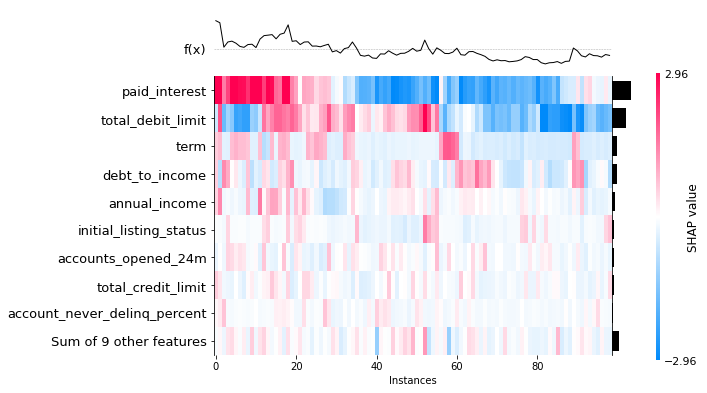

In [80]:
shap.plots.heatmap(shap_values[1:100])


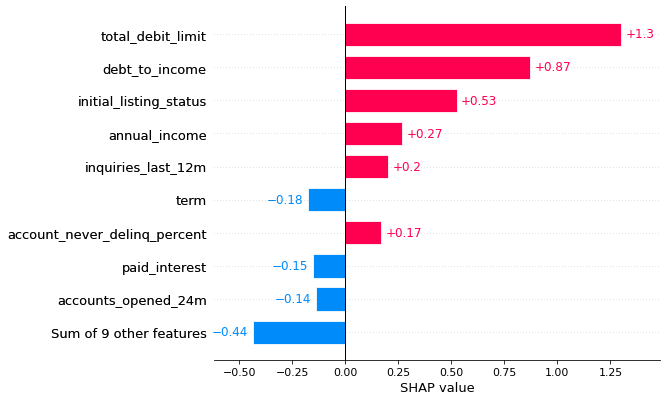

In [81]:

shap.plots.bar(shap_values[0])

In [82]:
shap_values = explainer.shap_values(X_test)
shap.initjs()
def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values[j,:], X_test.iloc[j,:]))

In [83]:
p(10)

The expected value is  [12.4345845]


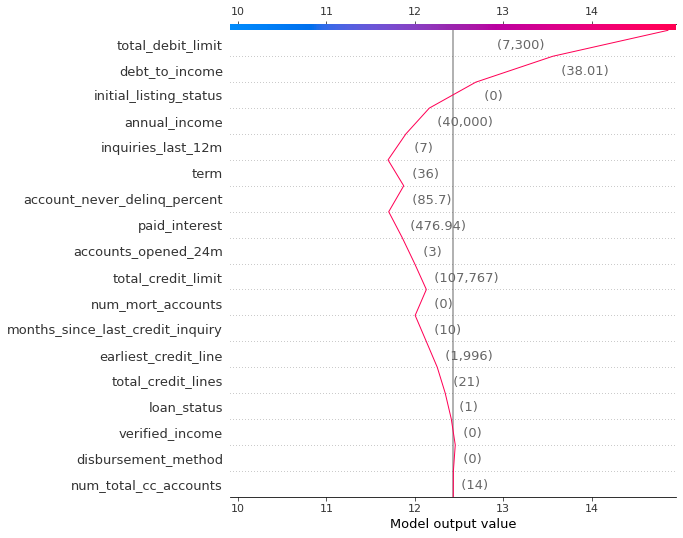

In [84]:
expected_value = explainer.expected_value
print("The expected value is ", expected_value)
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test)